# Price/Earnings to Growth Ratio Analysis

(by Avril Childs)

Price Earning to Growth Ratios factors in how fast a company is expected to grow and it adds context to the P/E ratio. 

> PEG  =  P/E ratio /  Earnings Growth Rate

Higher PEG values might suggest that the stock is potentially overvalued. PEG ratio < 1 suggests that a stock might be undervalued and can be seen as good value for an investor. PEG ratios > 2 are deemed overvalued.   

In [439]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

## Data Exploration 

In [440]:
peg_df = pd.read_excel('Stock_Screening_CFG v2.xlsx', sheet_name = 'PEG', index_col=0)
peg_df.head(10)

,NasdaqGS:MSFT,NasdaqGS:AAPL,NasdaqGS:NVDA,NasdaqGS:AMZN,NasdaqGS:GOOGL,NasdaqGS:META,NYSE:BRK.B,NasdaqGS:AVGO,NasdaqGS:TSLA,NYSE:LLY,...,NYSE:IVZ,NYSE:DVA,NasdaqGS:AAL,NYSE:MHK,NYSE:BEN,NYSE:RL,NYSE:BIO,NasdaqGS:PARA,NasdaqGS:FOX,NasdaqGS:NWS
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-20,2.52670,3.11150,1.22282,1.64665,1.28016,1.28570,0,1.69814,8.07322,1.43749,...,0.90199,1.00623,1.05878,1.24964,2.56903,1.40450,0.00000,18.27552,0,0
2024-06-30,2.57633,2.82897,1.29942,1.73510,1.33051,1.35424,0,1.73019,6.34718,1.61212,...,0.84491,1.00458,1.04142,1.08589,1.85584,1.48848,0.00000,0.81061,0,0
2024-05-31,2.39152,2.65271,1.00431,1.57917,1.29337,1.20748,0,1.68642,5.27222,1.46096,...,0.89049,1.06657,1.02528,4.4661,1.96496,1.58898,0.00000,0.79484,0,0
2024-04-30,2.23881,2.50915,0.98162,1.74805,1.11116,1.00278,0,1.72332,5.40475,1.58189,...,0.8054,1.15203,1.05117,4.22526,1.66899,1.22446,0.00000,0.72346,0,0
2024-03-31,2.31286,2.73096,1.03528,1.90294,1.35313,1.18007,0,1.85625,3.85122,1.90343,...,1.08472,1.14994,0.07598,NM,4.15192,1.40202,0.00000,0.81454,0,0
2024-02-29,2.25233,2.88542,0.92364,1.76587,1.24582,1.19211,0,1.94507,3.95894,2.13077,...,1.01174,1.05421,0.0765,NM,4.05839,1.38828,0.00000,2.30921,0,0
2024-01-31,2.17801,2.90746,0.74085,1.84933,1.26764,1.11591,0,1.76241,3.75775,2.71862,...,2.23356,0.77086,0.07182,NM,3.62951,1.38651,0.00000,NM,0,0
2023-12-31,2.29538,3.20564,0.60053,1.67947,1.22975,1.03982,0,1.58082,4.15923,2.51243,...,2.57281,0.7482,0.12301,NM,6.71323,1.37553,6.62686,NM,0,0
2023-11-30,2.47231,2.89435,0.61752,1.63791,1.30339,0.96508,0,1.62363,3.52785,2.52231,...,2.69718,0.69629,0.1117,NM,NM,1.23489,6.16628,NM,0,0


This is a wide dataframe of PEG values of individual companies with each row a specific date and columns are individual companies. Data is numeric (floats).

In [441]:
peg_df.index = pd.to_datetime(peg_df.index)
peg_df = peg_df.sort_index(ascending=True)
peg_df.shape

(115, 496)

In [442]:
peg_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2015-01-31 to 2024-07-20
Columns: 496 entries, NasdaqGS:MSFT to NasdaqGS:NWS
dtypes: float64(294), int64(4), object(198)
memory usage: 446.5+ KB


We can see here that there are 115 rows of PEG data and 496 columns. The data types for the columns - which represent indivual companies - are mixed and need normalisation. Ideally, the columns should be numeric(float). Columns with "Object" are because they contain the string "NM" (which means "not meaningful"). 

### Data transformation - converting to long dataset

In [ ]:

peg_long = peg_df.reset_index().melt(id_vars = 'Date' , var_name='Company', value_name='PEG Ratio')
peg_long

,Date,Company,PEG Ratio
0,2015-01-31,MSFT,1.65976
1,2015-02-28,MSFT,1.88252
2,2015-03-31,MSFT,1.74913
3,2015-04-30,MSFT,2.09365
4,2015-05-31,MSFT,2.02111
...,...,...,...
57035,2024-03-31,NWS,0.00000
57036,2024-04-30,NWS,0.00000
57037,2024-05-31,NWS,0.00000
57038,2024-06-30,NWS,0.00000


In [451]:
peg_long.describe()

,Date,PEG Ratio
count,57040,54621.000000
mean,2019-10-30 16:04:10.434782464,2.787908
min,2015-01-31 00:00:00,0.000000
25%,2017-05-31 00:00:00,1.128500
50%,2019-10-31 00:00:00,1.772510
75%,2022-03-31 00:00:00,2.709910
max,2024-07-20 00:00:00,279.222070
std,NaN,7.646846


The large gap between 75th percentile and max shows that there are significant outliers in the dataset. 

## Data Cleaning 

### 1. Renaming Columns to remove punctuation

Naming convention in python doesn't accept ':'
So list comprehension is used to remove and simplify the company names 

In [443]:
#remove the prefixes and ':'
peg_df.columns = [column.split(":")[-1] for column in peg_df.columns]
peg_df.columns

Index(['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOGL', 'META', 'BRK.B', 'AVGO',
       'TSLA', 'LLY',
       ...
       'IVZ', 'DVA', 'AAL', 'MHK', 'BEN', 'RL', 'BIO', 'PARA', 'FOX', 'NWS'],
      dtype='object', length=496)

### 2. Standardising Column Data Types


Currently some PEG values are floats, integers and objects. Columns with datatype = object are columns with 'NM' data which is not recognised as missing values but strings.

In [444]:
peg_df = peg_df.apply(pd.to_numeric, errors ='coerce')  #converts to numbers - floats

In [445]:
peg_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2015-01-31 to 2024-07-20
Columns: 496 entries, MSFT to NWS
dtypes: float64(492), int64(4)
memory usage: 446.5 KB


In [446]:
#exploring int(64) columns 
peg_df[peg_df.select_dtypes(include='int64').columns]

,BRK.B,SW,FOX,NWS
Date,,,,
2015-01-31,0,0,0,0
2015-02-28,0,0,0,0
2015-03-31,0,0,0,0
2015-04-30,0,0,0,0
2015-05-31,0,0,0,0
...,...,...,...,...
2024-03-31,0,0,0,0
2024-04-30,0,0,0,0
2024-05-31,0,0,0,0


Integer data is due to 0s. 

### 3. Outliers Management

#### Distribution

Text(0, 0.5, 'Frequency')

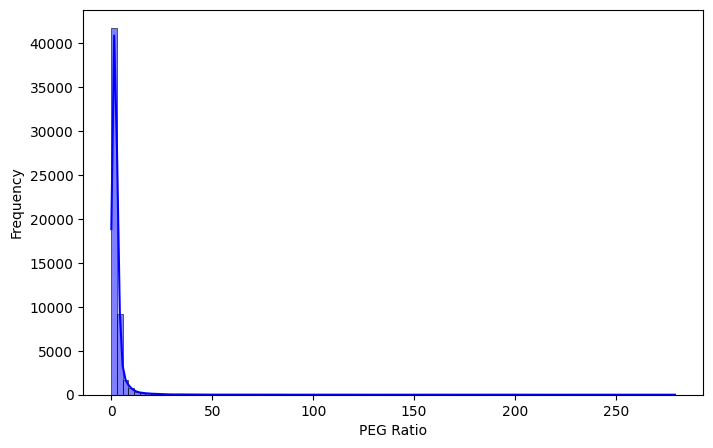

In [461]:
#Frequency histogram
plt.figure(figsize=(8,5))
sns.histplot(data=peg_long, x='PEG Ratio', bins=100, kde=True, color='blue')
plt.xlabel('PEG Ratio')
plt.ylabel('Frequency')


There are extreme values within the data set. Looking at the frequency distribution above, there is a severe right skew. 

We use winsorisation (see https://www.datacamp.com/tutorial/winsorized-mean) to replace extreme values.

In [464]:
from scipy.stats.mstats import winsorize

peg_df_winsorized = peg_df.copy()

#use a for loop to iterate over every column to change replace extreme values using winsorisation
for company in peg_df_winsorized.columns:   
    peg_data = peg_df_winsorized[company].values
    data = winsorize(peg_data, limits=[0.00, 0.05]) #setting at 95th percentile
    peg_df_winsorized[company] = data  # replacing winsorised data back into the column

In [465]:
#checking result of winsorisation
# Transform  wide dataset to a long dataset using melt()
peg_win_long = peg_df_winsorized.melt(var_name='Company', value_name='PEG Ratio')

top_peg_outliers = peg_win_long.sort_values(by='PEG Ratio', ascending=False).head(10)
top_peg_outliers


,Company,PEG Ratio
17542,MAR,279.22207
17552,MAR,279.22207
17551,MAR,279.22207
17550,MAR,279.22207
17546,MAR,279.22207
17544,MAR,279.22207
49756,UDR,263.46379
45565,EQT,258.20216
31202,TRGP,250.75817
45566,EQT,245.63574


There are still companies with PEG >100. When PEG is over 100, it becomes not meaningful as the ratio nears zero and is likely caused by data anomaly.  In this instance, values over 100 will be replaced by NaN values and then replaced 

In [ ]:
# Replace PEG > 100 with NaN values
peg_df_replaced = peg_df_winsorized.mask(peg_df_winsorized > 100, np.nan)
peg_replaced_long = peg_df_replaced.melt(var_name='Company', value_name='PEG Ratio')

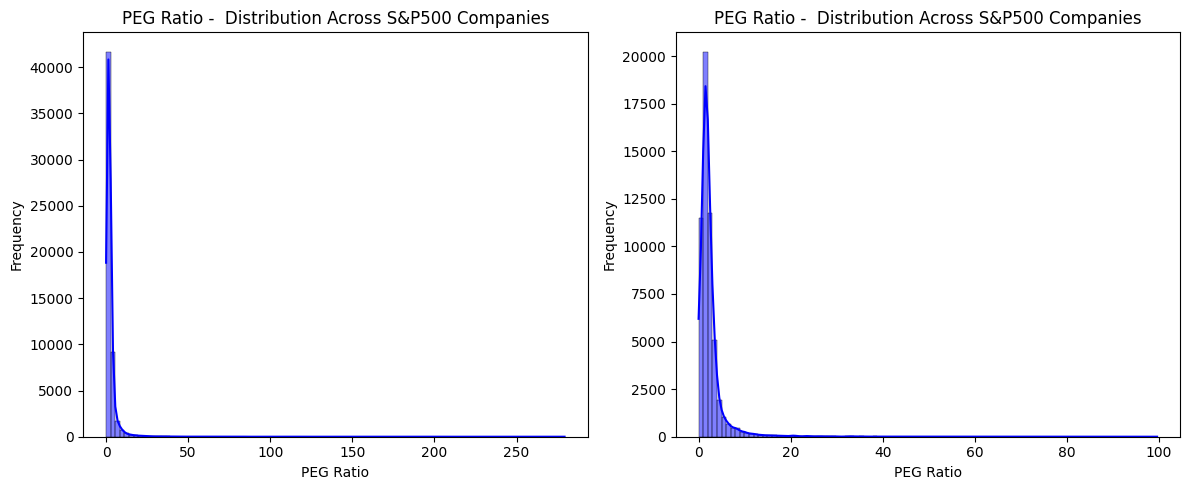

In [ ]:
# checking top value 
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=peg_long, x='PEG Ratio', bins=100, kde=True, color='blue')
plt.title('PEG Ratio -  Distribution Across S&P500 Companies')
plt.xlabel('PEG Ratio')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=peg_replaced_long, x='PEG Ratio', bins=100, kde=True, color='blue')
plt.title('PEG Ratio -  Distribution Across S&P500 Companies')
plt.xlabel('PEG Ratio')
plt.ylabel('Frequency')

plt.tight_layout()

### 4. Managing Zero and NaN data

Zero or missing values can be due to the following reasons:

- PEG depends on earnings growth forecasts which may not be availalbe for some companies
- Some analysts may avoid estimating growth due to volatility. 
- If expected growth is 0%, PEG becomes undefined (zero division)
- Data quality issues
- A negative PEG does not usually provide useful insight and analysts ignore/mask negative PEG values


In [ ]:
zero_counts = (peg_df_replaced == 0).sum()  # count how many values are 0 in each company
nan_counts = peg_df_replaced.isna().sum()   #count how many values are NaN in each company

In [ ]:
missing_stats = pd.DataFrame({
    'Zeros': zero_counts,
    'NaNs': nan_counts
})
missing_stats['Total Missing'] = missing_stats['Zeros'] + missing_stats['NaNs']

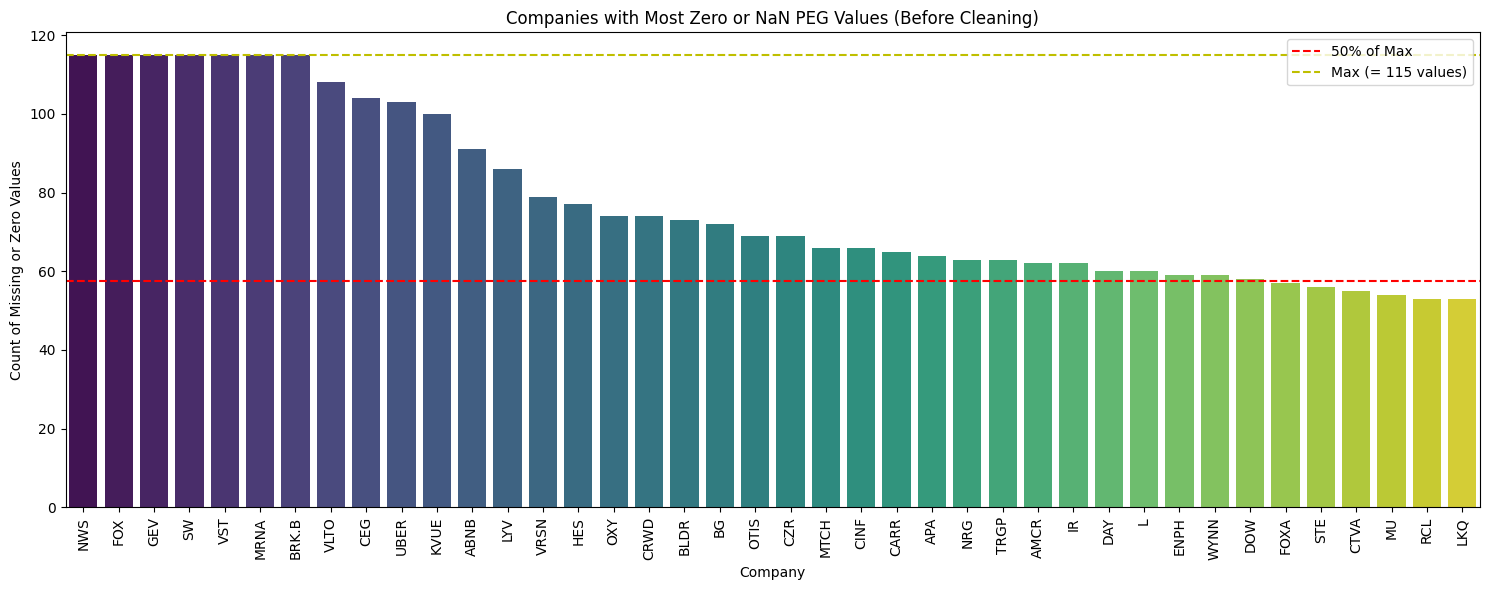

In [ ]:
# Sort by most missing values
top_missing = missing_stats.sort_values('Total Missing', ascending=False).head(40)

max_y = top_missing['Total Missing'].max()
plt.figure(figsize=(15, 6)) 
sns.barplot(data=top_missing, x=top_missing.index, y='Total Missing', palette="viridis", hue=top_missing.index, legend=False)

plt.title("Companies with Most Zero or NaN PEG Values (Before Cleaning)")
plt.xlabel("Company")
plt.ylabel("Count of Missing or Zero Values")
plt.axhline(y=0.5 * max_y, color='r', linestyle='--', label='50% of Max')  #showing 50% line of the y-axis
plt.axhline(y= max_y, color='y', linestyle = '--', label = 'Max (= 115 values)'  )
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()

Based on the graph above, we decided to drop companies with 50% or more not meaningful values.

In [ ]:
#looking for companies (columns) with 50% or more 0 or NM values
total_months = len(peg_df_replaced)
columns_to_drop =[]


for company in peg_df_replaced.columns:
    zero_ratio = zero_counts[company] /total_months
    nan_ratio =  nan_counts[company] / total_months
    zero_nan_ratio = zero_ratio + nan_ratio 

    if zero_ratio >0.3 or nan_ratio > 0.5 or zero_nan_ratio > 0.5:
        columns_to_drop.append(company)

peg_df_dropped = peg_df_replaced[columns_to_drop]

peg_df_filtered = peg_df_replaced.drop(columns=columns_to_drop) 

In [324]:
peg_df_dropped.to_csv("data/peg_dropped_companies.csv") # saved data of dropped companies in CSV file. 

peg_df_dropped.columns  #to show list of companies that have been dropped will be essential for later correlational analysis

Index(['BRK.B', 'UBER', 'CRWD', 'ABNB', 'CEG', 'CARR', 'GEV', 'HES', 'OXY',
       'AMP', 'MRNA', 'OTIS', 'IR', 'CTVA', 'RCL', 'DOW', 'KVUE', 'KDP',
       'VICI', 'TRGP', 'CBRE', 'VST', 'BR', 'SW', 'STE', 'WY', 'VLTO', 'CINF',
       'BLDR', 'BG', 'VRSN', 'NRG', 'LVS', 'AMCR', 'ENPH', 'L', 'ROL', 'LYV',
       'LKQ', 'APA', 'MTCH', 'AIZ', 'FOXA', 'DAY', 'NCLH', 'WYNN', 'CZR', 'GL',
       'FOX', 'NWS'],
      dtype='object')

In [325]:
#checking the datatypes 
peg_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2015-01-31 to 2024-07-20
Columns: 446 entries, MSFT to PARA
dtypes: float64(446)
memory usage: 401.6 KB


In [326]:
#checking dataframe for zero as min 
peg_df_filtered.describe()

,MSFT,AAPL,NVDA,AMZN,GOOGL,META,AVGO,TSLA,LLY,JPM,...,PAYC,FMC,IVZ,DVA,AAL,MHK,BEN,RL,BIO,PARA
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,94.000000,115.000000,97.000000,...,115.000000,115.000000,115.000000,115.000000,85.000000,93.000000,74.000000,115.000000,115.000000,75.000000
mean,2.163314,1.815380,2.036315,2.569957,1.346004,1.215403,1.039223,3.185960,1.875784,3.269185,...,2.332636,1.613006,2.615474,1.213719,1.055876,1.914322,1.923212,1.596071,3.329594,1.226537
std,0.240631,0.640553,0.637758,1.407571,0.221438,0.366830,0.321713,2.596019,0.366507,8.662194,...,0.784322,0.383489,4.808160,0.489429,3.192417,1.483414,2.414012,0.901718,3.594376,2.313928
min,1.593410,0.718780,0.600530,1.357090,0.939740,0.725050,0.565040,0.000000,1.298980,0.000000,...,0.000000,0.832130,0.314200,0.509020,0.000000,0.000000,0.665440,0.144700,0.000000,0.259740
25%,1.991365,1.363065,1.531095,1.752435,1.213785,1.010485,0.805595,1.260660,1.580780,1.368590,...,1.811760,1.388505,0.891505,0.831865,0.039820,1.121110,1.053408,1.222800,0.000000,0.657180
50%,2.192400,1.709730,2.065170,2.025200,1.303390,1.144950,0.946030,2.503430,1.788330,1.701460,...,2.136310,1.611900,1.008060,1.107150,0.271780,1.587340,1.455870,1.494110,2.648960,0.772880
75%,2.340200,2.374830,2.510445,2.601890,1.455160,1.288390,1.237700,4.173555,2.079950,2.207410,...,2.628835,1.750460,1.194735,1.528635,0.892880,2.195800,1.706257,1.846910,4.220775,0.850365
max,2.544530,2.917660,3.084070,7.386300,1.884360,2.447720,1.723320,13.471810,2.688290,83.387110,...,3.971850,2.455580,21.371520,2.192570,24.804790,10.403700,17.994770,3.823490,13.090780,18.275520


### 5. Replacing remaining zeros and NM values 


Above, there are still 0 showing in the  'min' observation. 
As this is a time-series data, we will backward fill and forward fill with existing data

In [ ]:
peg_df_nan = peg_df_filtered.copy()  # make a copy
peg_df_nan = peg_df_filtered.replace(0, value=np.nan) #temporary replacing 0 with NaN
peg_df_final = peg_df_nan.fillna(peg_df_filtered.mean())

peg_df_final.to_csv("data/peg_data_cleaned.csv") 

Checking minimum and maximum values in the dataset have changed after cleaning:

In [328]:
peg_df.min().min()

np.float64(0.0)

In [329]:
peg_df_final.min().min()

np.float64(0.03476)

In [330]:
peg_df.max().max()

np.float64(279.22207)

In [331]:
peg_df_final.max().max()

np.float64(99.55796)

In [332]:
#Checking missing values
nan_counts = peg_df_final.isna().sum()
nan_counts = nan_counts[nan_counts >0]
nan_df =  nan_counts.reset_index()
nan_df.columns = ['Company', 'NaN_Count']
nan_df

,Company,NaN_Count


No NaN values now exist and maximun value is < 100. 

## Return Values Data

In [504]:
#retrieving retu
returns_df = pd.read_excel('Stock_Screening_CFG v2.xlsx', sheet_name='Returns', index_col=0)

returns_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131 entries, 2024-07-20 to 2013-09-30
Columns: 496 entries, NasdaqGS:MSFT to NasdaqGS:NWS
dtypes: float64(496)
memory usage: 508.6 KB


In [505]:
returns_df.index = pd.to_datetime(returns_df.index)
returns_df = returns_df.sort_index(ascending=True)

### Matching  Returns and PEG Data frames
- To ensure that the column labels match. 
- Using the same process to change column labels to remove prefix and :
- Remove the columns that have been dropped due to >50% NM or 0 values in the PEG data
- need to align the dates

In [506]:
returns_df.columns = [column.split(":")[-1] for column in returns_df.columns]
returns_df.columns

Index(['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOGL', 'META', 'BRK.B', 'AVGO',
       'TSLA', 'LLY',
       ...
       'IVZ', 'DVA', 'AAL', 'MHK', 'BEN', 'RL', 'BIO', 'PARA', 'FOX', 'NWS'],
      dtype='object', length=496)

In [507]:
nan_counts = returns_df_filtered.isna().sum()
nan_counts = nan_counts[nan_counts >0]
nan_df =  nan_counts.reset_index()
nan_df.columns = ['Company', 'NaN_Count']
nan_df

,Company,NaN_Count
0,ANET,10
1,PYPL,23
2,HLT,4
3,HWM,39
4,FTV,35
5,KHC,23
6,HPE,26
7,KEYS,14
8,SYF,12
9,INVH,42


In [508]:
def drop_cols_with_many_zeros(df, threshold=0.5):
    # Calculate the percentage of 0s in each column
    zero_ratio = (df == 0).sum() / len(df)
    # Keep only columns where the ratio of 0s is less than the threshold
    return df.loc[:, zero_ratio < threshold]

def clean_feature(df):
    df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).astype(float)
    df = drop_cols_with_many_zeros(df)
    return df

returns_df_cleaned = clean_feature(returns_df)

C:\Users\teamc\AppData\Local\Temp\ipykernel_17880\3804907447.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).astype(float)


In [509]:
valid_returns_col = peg_df_final.columns

returns_df_filtered = returns_df[valid_returns_col]


returns_df_filled =  returns_df_filtered.fillna(0)

In [512]:
returns_df_final=  returns_df_filled.loc[peg_df_final.index]

# checking end date of the data set.info()
returns_df_final.info() 
peg_df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2015-01-31 to 2024-07-20
Columns: 446 entries, MSFT to PARA
dtypes: float64(446)
memory usage: 401.6 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2015-01-31 to 2024-07-20
Columns: 446 entries, MSFT to PARA
dtypes: float64(446)
memory usage: 405.7 KB


In [513]:
# Confirm same shape & index of both the Returns data and the PEG data
print(peg_df_final.shape, returns_df_final.shape)
print(peg_df_final.index.equals(returns_df_final.index))  # Should be True
print(peg_df_final.columns.equals(returns_df_final.columns))  # Should be True

(115, 446) (115, 446)
True
True


In [514]:
returns_df_final.describe()

,MSFT,AAPL,NVDA,AMZN,GOOGL,META,AVGO,TSLA,LLY,JPM,...,PAYC,FMC,IVZ,DVA,AAL,MHK,BEN,RL,BIO,PARA
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,...,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,0.021650,0.021604,0.057719,0.025619,0.019013,0.020791,0.027707,0.038863,0.024593,0.013047,...,0.023030,0.003754,-0.001936,0.009086,-0.007024,0.003580,-0.003645,0.004542,0.011745,-0.004479
std,0.063688,0.081019,0.137072,0.090182,0.069152,0.098835,0.085538,0.179618,0.071266,0.070531,...,0.122043,0.085088,0.107287,0.089374,0.117303,0.099389,0.087123,0.105083,0.087786,0.132019
min,-0.130248,-0.184045,-0.320274,-0.237525,-0.179467,-0.326342,-0.209673,-0.367334,-0.118633,-0.224615,...,-0.285300,-0.223356,-0.369444,-0.221011,-0.360105,-0.370697,-0.232996,-0.366600,-0.232027,-0.430719
25%,-0.016963,-0.035947,-0.026280,-0.034046,-0.020741,-0.039504,-0.022676,-0.074833,-0.023026,-0.032038,...,-0.047909,-0.046995,-0.065003,-0.038502,-0.082571,-0.060872,-0.063625,-0.064542,-0.036936,-0.064754
50%,0.020791,0.021623,0.058841,0.025468,0.018753,0.017047,0.022766,0.011034,0.020114,0.019905,...,0.038920,0.007510,-0.007084,0.005268,-0.003914,0.016587,-0.002178,-0.012495,0.014515,0.005745
75%,0.059240,0.082787,0.144285,0.078192,0.065994,0.081022,0.072974,0.112994,0.068109,0.055989,...,0.086811,0.061009,0.069762,0.045851,0.059719,0.069017,0.051514,0.075703,0.067270,0.054283
max,0.196409,0.214380,0.383988,0.270596,0.217502,0.271569,0.289641,0.741452,0.231758,0.204593,...,0.459953,0.207740,0.350063,0.313738,0.268868,0.219401,0.201210,0.294077,0.255420,0.372038


## PEG Analysis



### PEG Ratio Trends

Median is chosen as it is more robust to outliers. 

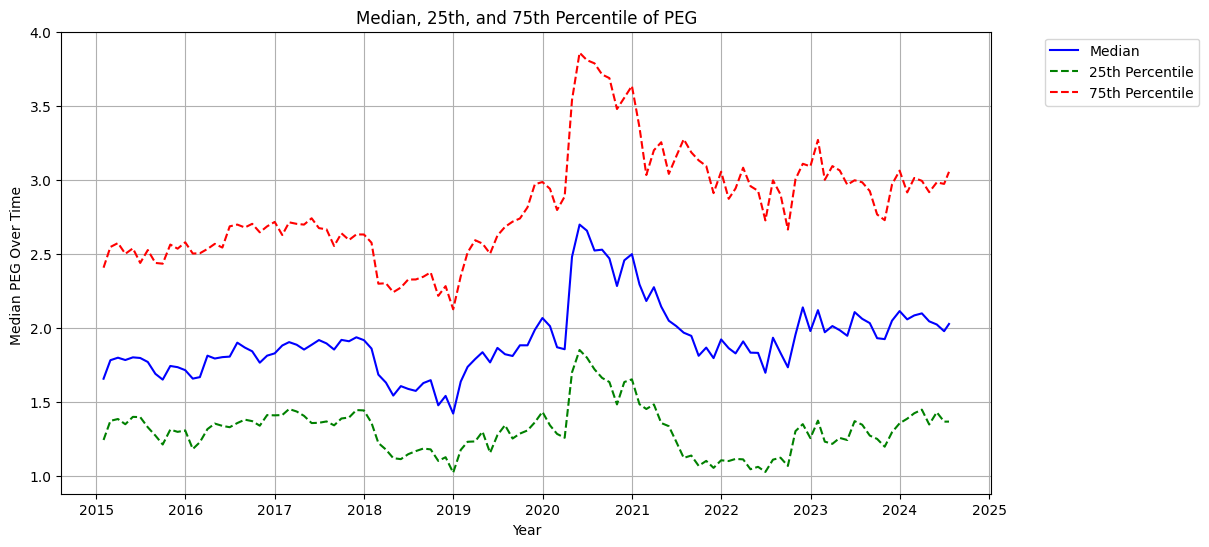

In [515]:
peg_median = peg_df_final.median(axis=1)

def percentile_graph(feature_df, feature_median, feature):

    q25 = feature_df.quantile(0.25, axis=1)  # 25th percentile
    q75 = feature_df.quantile(0.75, axis=1)  # 75th percentile

    plt.figure(figsize=(12, 6))
    plt.plot(feature_median.index, feature_median, label='Median', color='blue')
    plt.plot(q25.index, q25, label='25th Percentile', color='green', linestyle='--')
    plt.plot(q75.index, q75, label='75th Percentile', color='red', linestyle='--')

    plt.xlabel('Year')
    plt.ylabel('Median PEG Over Time ')
    plt.title(f'Median, 25th, and 75th Percentile of {feature}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)

percentile_graph(peg_df_final, peg_median, 'PEG')

In [516]:
# Create bins
def set_peg_bins(df):
    peg_bins = pd.cut(
        df,
        bins=[-float('inf'), 1, 2, float('inf')],
        labels=['< 1', '1-2', '> 2']
    )

    peg_counts = peg_bins.value_counts().sort_index()
    
    return peg_counts


<Axes: title={'center': 'Company Distribution by PEG Ratio - Jun 2020'}>

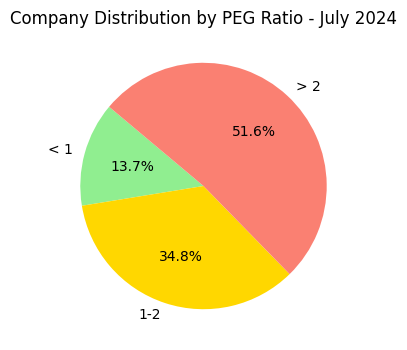

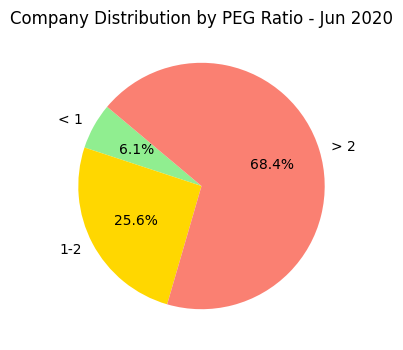

In [517]:
#latest 
latest_peg = peg_df_final.iloc[-1]
latest_peg_counts = set_peg_bins(latest_peg)


plt.figure(figsize=(4, 4))
colors = ['lightgreen', 'gold', 'salmon']
latest_peg_counts.plot.pie(
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    ylabel='',  # hide y-axis label
    title='Company Distribution by PEG Ratio - July 2024'
)

peg_jun2020 = peg_df_final.loc['2020-06-30']
peg_jun2020_counts = set_peg_bins(peg_jun2020)

plt.figure(figsize=(4, 4))
colors = ['lightgreen', 'gold', 'salmon']
peg_jun2020_counts.plot.pie(
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    ylabel='', 
    title='Company Distribution by PEG Ratio - Jun 2020')

The PEG ratio shows a generally flat curve with the exception of 2020-2022 during the COVID-19 pandemic, where we observe a sharp increase in PEG values, before a gradual correction 2 years after. This in confirmed in the pie charts which demonstrates the effect of the pandemic at its height in 2020, where company growth slowed, and a 6% of companies had PEG values < 1 which is deemed undervalued, and 25.6% at fair value. PEG values still remain high post-pandemic, with just slightly over half stocks are overvalued (PEG > 2) which may suggest continued challenges to growth. 

## PEG Ratio vs Monthly Stock Returns  - Analysis

In [518]:
returns_median = returns_df_final.median(axis=1)

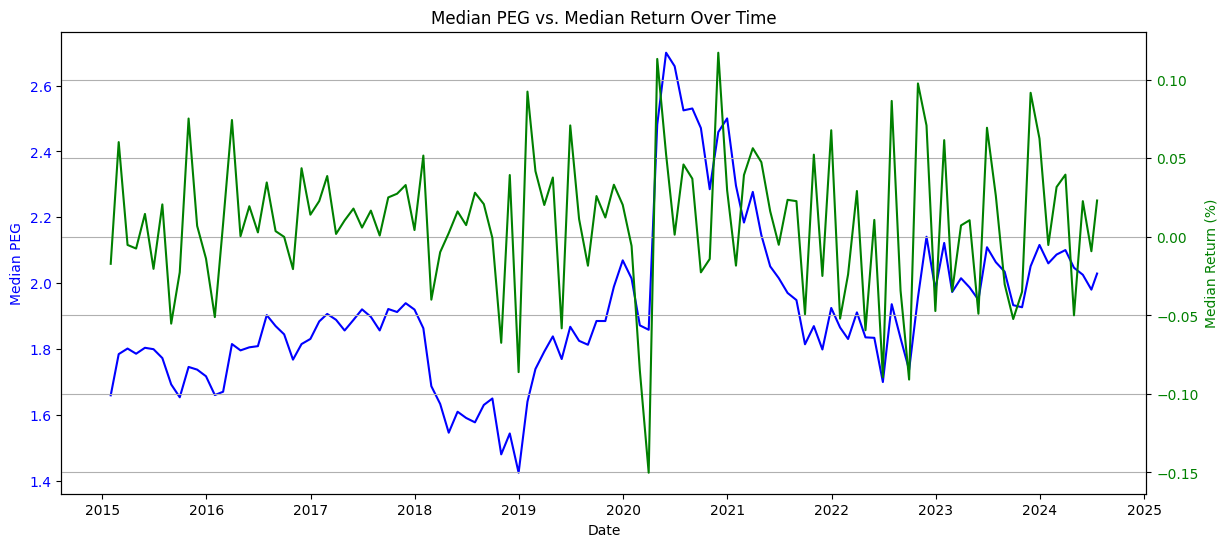

In [519]:
# function for comparing median PEG and median returns over time
def median_comparison_viz(median_feature_df, returns_df, feature):
    fig, ax1 = plt.subplots(figsize=(14, 6))


    # Plot feature on the left y-axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel(f'Median {feature}', color='blue')
    ax1.plot(median_feature_df,color='blue', label=f'Median {feature}')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a second y-axis for returns
    ax2 = ax1.twinx()
    ax2.set_ylabel('Median Return (%)', color='green')
    ax2.plot(returns_df, color='green', label='Median Return (%)')
    ax2.tick_params(axis='y', labelcolor='green')


    plt.title(f'Median {feature} vs. Median Return Over Time')
    plt.grid(True)


median_comparison_viz(peg_median, returns_median, 'PEG')



The above graph shows a trend between the median PEG values and the median Returns values. There was a significant sharp upturn in the first half of 2020 and then a gradual downward trend in both sets of data in 2020 - 2022, the period where COVID hit businesses. Despite recovery, 2023 saw a slight spike, possibly due to the effect of Federal Reserve interest rate increased in 2022. Due to the volatility of the returns data, it would be worth looking at rolling averages as an alternative. 

### Using Rolling Averages

Rolling averages were decided based on the following:
* PEG is typically a more stable and slow-moving metric. 
* Returns are more volatile and may benefit from a longer window to extract meaningful data
* Diffrent times of impact : valuation changes with PEG may influence returns with a lag, so a shorter PEG window and longer return window may model this. 



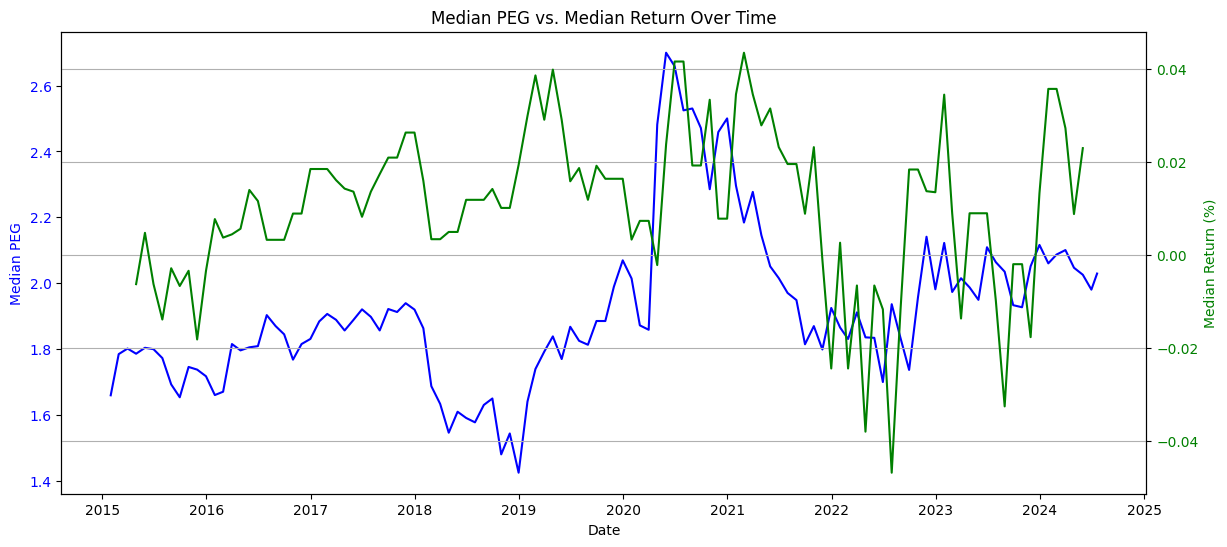

In [ ]:
# Apply a rolling window to smooth the series

returns_smoothed = returns_median.rolling(window=6, center=True).median()
peg_smoothed = peg_median.rolling(window=6, center=True).median()
median_comparison_viz(peg_median, returns_smoothed, 'PEG')



* From the graph above we observe that both the median PEG ratio and median monthly returns generally follow a similar long-term trend, suggesting a degree synchronicity between the values. This is unsuprising as stock price has a direct influence on the computation of PEG.

* At turning points, however we can observe that where PEG ratio declines, there is a corresponding rise in Returns (eg. at x-axis= 2019 and 2020). This inverse relationship may indicate that lower valuations often precede preriods of stronger performance, suggesting that undervaluation can present to investors opportunities for upside returns. 

* Though this relationship is not always mirrored at all points in the time series, these sharp divergences at inflection points suggest that changes in valuation may act as an indicator for returns.

### Correlation Coefficients

In [521]:
def merged_long(feature_df, returns_df, feature):
    feature_long = feature_df.reset_index().melt(id_vars='Date', var_name='Company', value_name= feature)
    returns_long = returns_df.reset_index().melt(id_vars='Date', var_name='Company', value_name='Return')
    
    for df in [feature_long, returns_long]:
        df['Date'] = pd.to_datetime(df['Date']) # Ensure datetime and sort
        df.sort_values(['Company', 'Date'], inplace=True)

# Merge dataframe on Date and Company
    merged_df = feature_long.merge(returns_long, on=['Date', 'Company'])
    merged_df = merged_df.dropna() #drop missing values

    return merged_df

merged_df = merged_long(peg_df_final, returns_df_final, 'PEG Ratio')
merged_df

,Date,Company,PEG Ratio,Return
0,2015-01-31,A,2.01630,-0.077430
1,2015-02-28,A,2.11596,0.117554
2,2015-03-31,A,1.83925,-0.015636
3,2015-04-30,A,1.87491,-0.004332
4,2015-05-31,A,1.85125,-0.004351
...,...,...,...,...
51285,2024-03-31,ZTS,2.70556,-0.146826
51286,2024-04-30,ZTS,2.79313,-0.058921
51287,2024-05-31,ZTS,2.49441,0.064808
51288,2024-06-30,ZTS,2.55031,0.022411


In [522]:

def correlation_raw(feature):
    corr_raw = merged_df[[feature, 'Return']].corr()
    print(corr_raw)

correlation_raw('PEG Ratio')

           PEG Ratio    Return
PEG Ratio   1.000000  0.023807
Return      0.023807  1.000000


<div class="alert alert-block alert-info">
 Correlation between PEG and Returns: <b> 0.02 </b>
</div>

In [523]:
#Correlation between the median values
def corr_coef(feature_df, return_df, feature):
    combined_medians = pd.concat([feature_df, return_df], axis=1)
    combined_medians.columns = [feature, 'Returns']
    correlation = combined_medians[feature].corr(combined_medians['Returns'])
    return correlation

print (corr_coef(peg_median, returns_median, 'PEG'))

0.3363383861065358



 Correlation between median PEG and median returns: 0.33 


Text(0.5, 1.0, 'Correlation between PEG vs Returns')

<Figure size 1000x600 with 0 Axes>

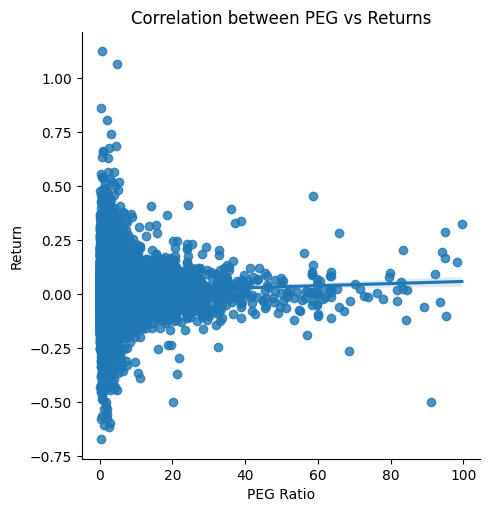

In [524]:
#Checking correlation with scatter plot
plt.figure(figsize=(10, 6))
sns.lmplot(data=merged_df, x='PEG Ratio', y='Return')
plt.title(f"Correlation between PEG vs Returns")
    

At individual stock level, there is neglible relationship between PEG ratio and returns in the short-term, which is confirmed with the scatter plot. . At aggregate level, it suggests a modest positive relationship which is counter-intuitive as a low PEG is favoured over a higher PEG value. This disparity suggests that it many not be a stong predictor but may hold significance with broader market trends. 

#### Positive vs Negative Correlation

In [ ]:
# Correlation using individual company data

corr_peg_company = {}  

for company in peg_df_final.columns:
    peg_series = peg_df_final[company]
    return_series = returns_df_final[company]

    combined = pd.concat([peg_series, return_series], axis=1).dropna()
    combined.columns = ['PEG', 'Return']
   
    corr_peg_company[company] = combined['PEG'].corr(combined['Return'])

# Convert to DataFrame 
corr_peg_df = pd.Series(corr_peg_company, name='PEG_Return_Correlation').to_frame()
corr_peg_df = corr_peg_df.sort_values(by='PEG_Return_Correlation')

Text(0, 0.5, 'S&P500 Company')

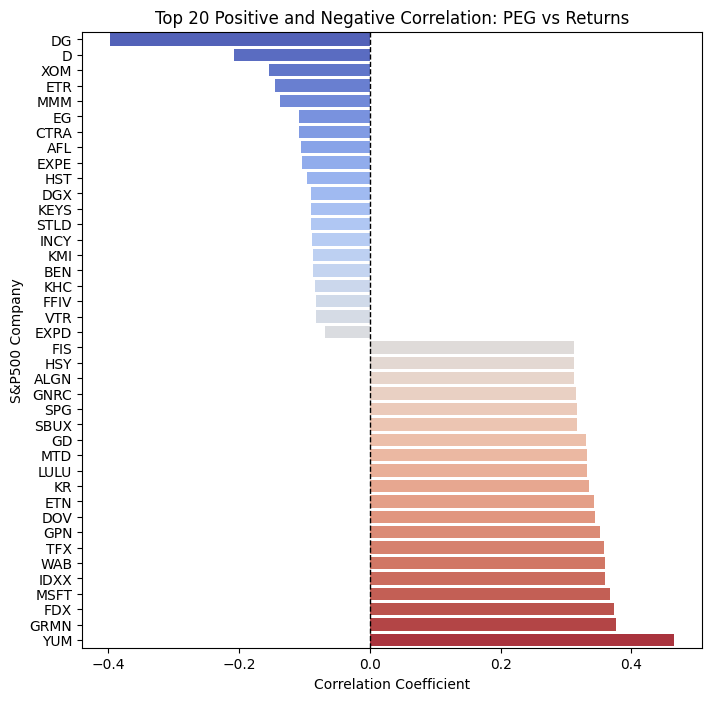

In [417]:
top_negative = corr_peg_df.head(20)
top_positive = corr_peg_df.tail(20)

combined_corr = pd.concat([top_negative, top_positive])
combined_corr = combined_corr.reset_index()
combined_corr.columns = ['Company', 'Correlation']
combined_corr = combined_corr.sort_values('Correlation')

plt.figure(figsize=(8,8))
sns.barplot(data=combined_corr, y = 'Company', x='Correlation', palette='coolwarm', hue = 'Company', legend=False)
#vertical line for 0
plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.title('Top 20 Positive and Negative Correlation: PEG vs Returns')
plt.xlabel('Correlation Coefficient')
plt.ylabel('S&P500 Company')


Text(0.5, 1.0, 'PEG-Return Correlation Direction')

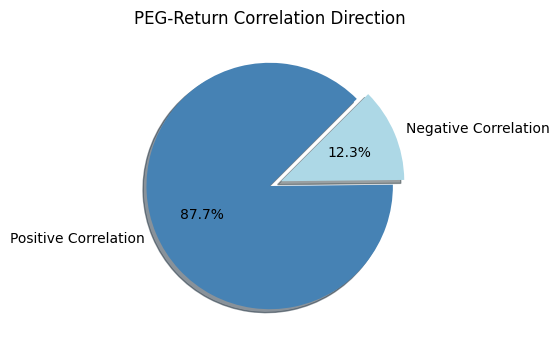

In [ ]:
# Counting positive and negative correlations
positive_count = (corr_peg_df['PEG_Return_Correlation'] > 0).sum()
negative_count = (corr_peg_df['PEG_Return_Correlation'] < 0).sum()

total = len(corr_peg_df)

#Create pie chart

labels = ['Positive Correlation', 'Negative Correlation']
sizes = [positive_count, negative_count]
colors = ['steelblue', 'lightblue']

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=45, explode=(0,0.1), shadow=True)
plt.title("PEG-Return Correlation Direction")


The large majority of stocks appear to be favoured with positive correlation. This is surprising given that the PEG ratio. incorporates price in its calculation, and positive correlation could be driven by price trends embedded within the metric itself, rather than fundamentals. 

Top correlated company: YUM


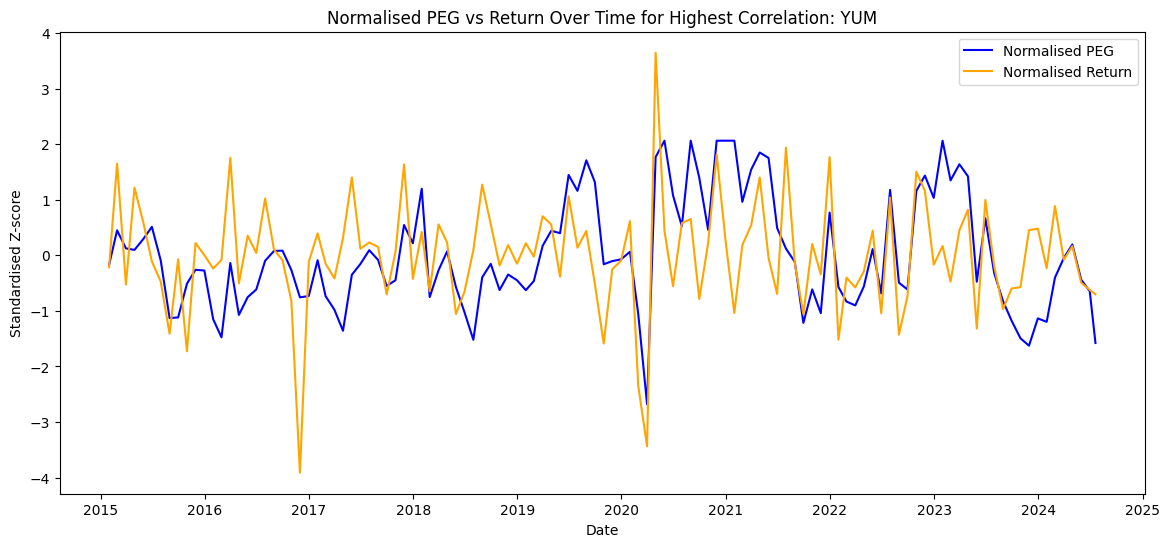

In [ ]:
# Get company with highest absolute correlation
top_corr_company = corr_peg_df['PEG_Return_Correlation'].abs().idxmax()
print(f"Top correlated company: {top_corr_company}")

df_top_peg_company = pd.DataFrame({
    'PEG Value': peg_df_final[top_corr_company],
    'Return': returns_df_final[top_corr_company]
}) 

# Normalise with Z-score method =  to make comparable Y-axis
df_normalised = (df_top_peg_company - df_top_peg_company.mean()) / df_top_peg_company.std()

plt.figure(figsize=(14, 6))
plt.plot(df_normalised['PEG Value'], label='Normalised PEG', color='blue')
plt.plot(df_normalised['Return'], label='Normalised Return', color='orange')
plt.title(f"Normalised PEG vs Return Over Time for Highest Correlation: {top_corr_company}")
plt.xlabel("Date")
plt.ylabel("Standardised Z-score")
plt.legend()


Overall there appears to be positive correlation with PEG which again is not unexpected as PEG value is proportional to stock price. Anaylsing the trend based on the top scoring postiive correlation company, it does appear that that rises and falls in PEG follows that of the stock price. However, it is important to note that a rise in PEG often follows with a dip in stock price in the months later. 

### Using Quartiles

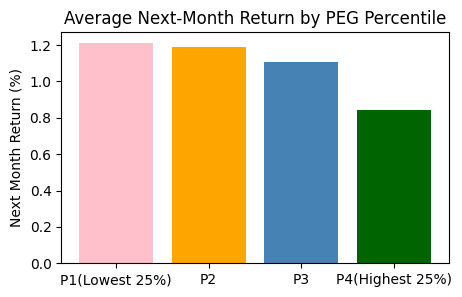

In [ ]:
def plot_quartile_returns(feature_df, return_df, feature):    
    # Assign quartiles row-wise
    quartiles = feature_df.apply(
        lambda x: pd.qcut(x, 4, labels=["P1(Lowest 25%)", "P2", "P3", "P4(Highest 25%)"]),
        axis=1
    )

    # Calculate average returns by quartile
    quartile_returns = []
    quartile_labels = ["P1(Lowest 25%)", "P2", "P3", "P4(Highest 25%)"]

    return_df = return_df.shift(-1)  #shift the return to next month data

    for quartile in quartile_labels:
        mask = (quartiles == quartile)
        avg_return = return_df[mask].mean(axis=1)
        quartile_returns.append(avg_return)

    # Combine into a summary DataFrame
    quartile_df = pd.concat(quartile_returns, axis=1)
    quartile_df.columns = quartile_labels

    # Plot average return by quartile
    mean_returns = quartile_df.mean()
    x = mean_returns.index
    y = mean_returns.values * 100  # convert to %

    plt.figure(figsize=(5, 3))
    plt.bar(x, y, color=['pink', 'orange', 'steelblue', 'darkgreen'])
    plt.title(f"Average Next-Month Return by {feature} Percentile")
    plt.ylabel("Next Month Return (%)")
    plt.xticks(rotation=0)
   

plot_quartile_returns(peg_df_final, returns_df_final, "PEG")

This gragh suggests that on average, the companies with the lowest PEG ratios experience the highest next-month returns  and the companies with the highest PEG ratios had the lowest average next-month returns (below 0.9%). This graph aligns with the general idea that lower PEG ratios may indicate potentially better investment opportunities in terms of future returns. However, it is important to note that this an average over a specific time period for a large group of company stocks. 

### The Magnificent Seven 

The Magnificent Seven refers to a group of seen large and influential growth companies that have significatly driven the performance of the US stock market, and have high investor interest. They are Apple (AAPL), Microsoft (MSFT), Alphabet (GOOGL), Amazon (AMZN), Meta Platforms (META), NVIDIA (NVDA) and Tesla (TSLA). 

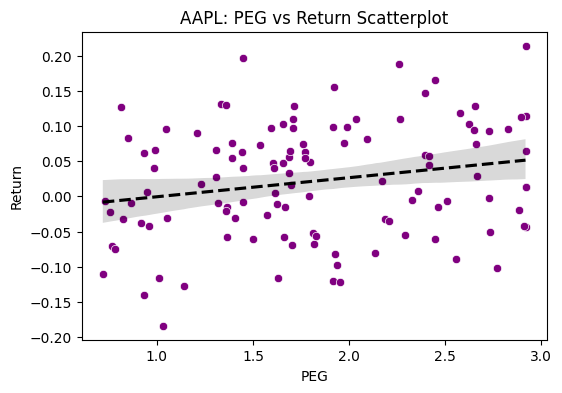

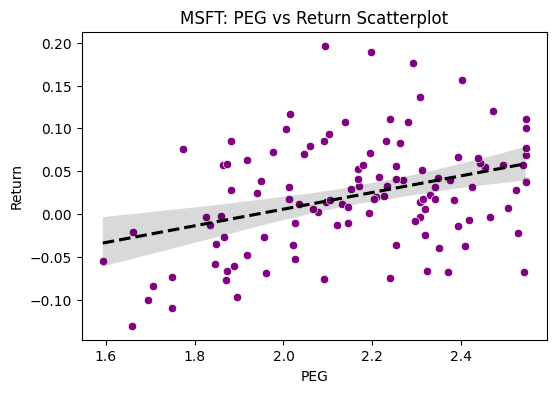

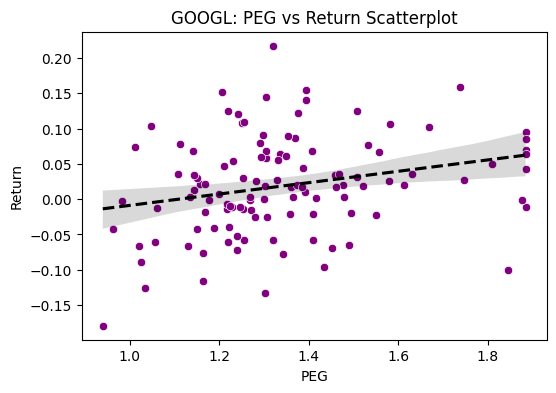

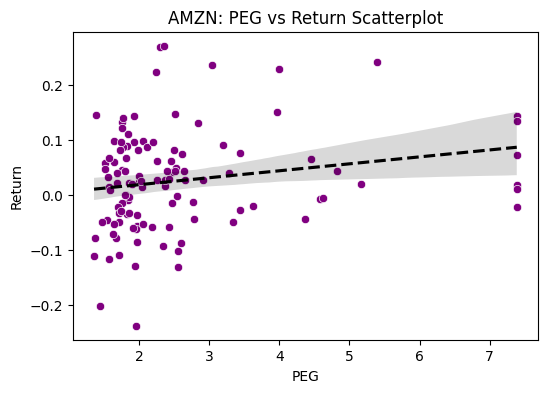

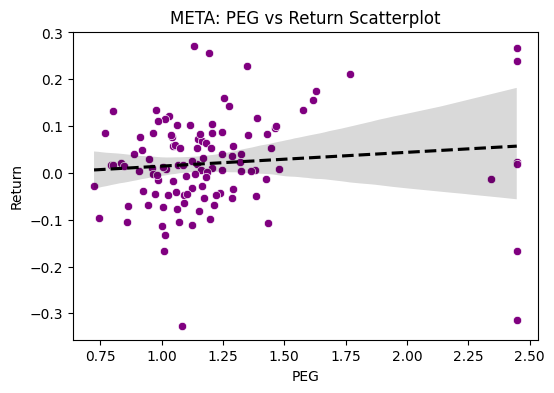

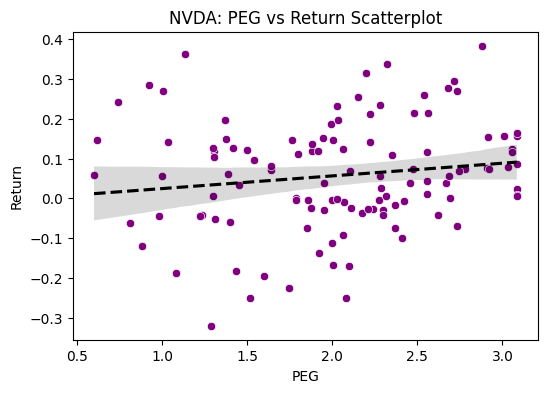

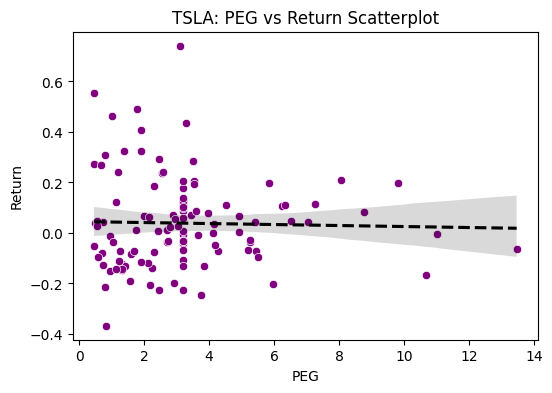

In [427]:

magnificent_7 = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'NVDA', 'TSLA']
def magnificent_7_scatter(feature_df, return_df, feature_name):
 
    for company in magnificent_7:

        if company in feature_df.columns and company in return_df.columns:
            df_scatter = pd.DataFrame({feature_name: feature_df[company],'Return': return_df[company]}).dropna()

            plt.figure(figsize=(6,4))
            sns.scatterplot(data=df_scatter, x=feature_name, y='Return', color='purple')
            sns.regplot(data=df_scatter, x=feature_name, y='Return', scatter=False, color='black', line_kws={'linestyle': '--'})
            plt.title(f"{company}: {feature_name} vs Return Scatterplot")

magnificent_7_scatter(peg_df_final, returns_df_final, 'PEG')
        


Text(0, 0.5, 'Correlation')

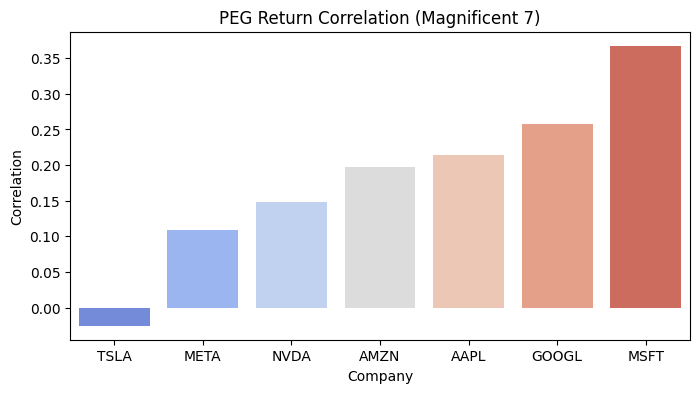

In [428]:
magnificent_corr = corr_peg_df.loc[corr_peg_df.index.isin(magnificent_7)].sort_values('PEG_Return_Correlation')

plt.figure(figsize=(8, 4))
sns.barplot(data=magnificent_corr.reset_index(), x='index', y='PEG_Return_Correlation', hue='index', palette='coolwarm', legend=False)
plt.title("PEG Return Correlation (Magnificent 7)")
plt.xlabel("Company")
plt.ylabel("Correlation")


For most of the Magnificent Seven stocks, there is a positive correlation between the PEG ratio and stock's return. The strength of this correction is highestin Microsoft and lowest in Tesla which shows a slightly negative correlationship. 

Companies with consistently high and predictable group like Microsoft might attract investors regardless of PEG value being higher, if they have strong confidence in the sustainability and quality of that growth. 

Companies that are more volatile with less predictable growth, like Tesla, is often subject to market sentiment and distruptive forces, and therefore show a lower correlation and a flat scatter plot.  

### Summary of Findings

*  Analysis within the same timeframe reveals a generally weak correlation between PEG ratio and stock return.  
* Stronger positive relationships emerge when examining aggregated median PEG rations and returns, as well as trends observed in rolling median graphs and quartile-based next-month return anlysis. This suggest a potential correlation when considering lagged data. 
* The PEG ratio dependence on the current stock price which directly reflects price movements, may mask its predictive capabilities. 